In [86]:
# importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=13)

In [102]:
Data = pd.read_excel(r"E:\Forecast Vol Analysis_Dutta.xlsx",index_col='ds', parse_dates=True)

In [103]:
# finding shape of the dataframe
print(Data.shape)

(107, 1)


In [104]:
Data.head()

,y
ds,
2020-08-01,19589
2020-08-08,143871
2020-08-15,117018
2020-08-22,115361
2020-08-29,190338


<AxesSubplot:title={'center':'Volume Data'}, xlabel='ds'>

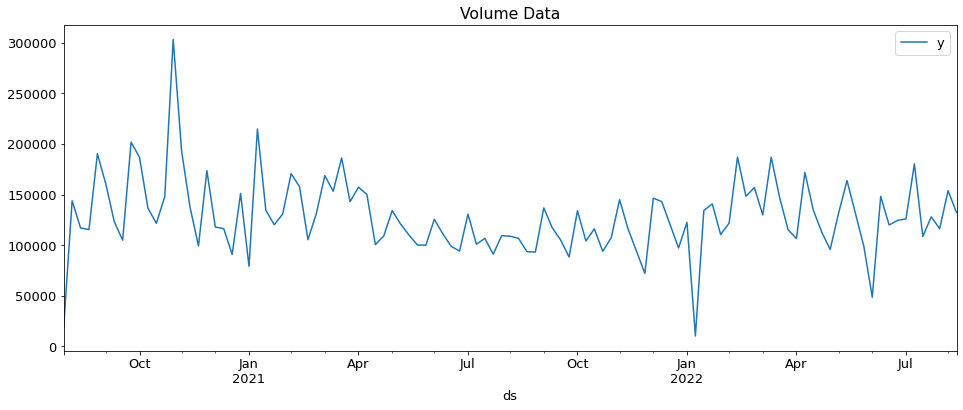

In [105]:
Data[['y']].plot(title='Volume Data')

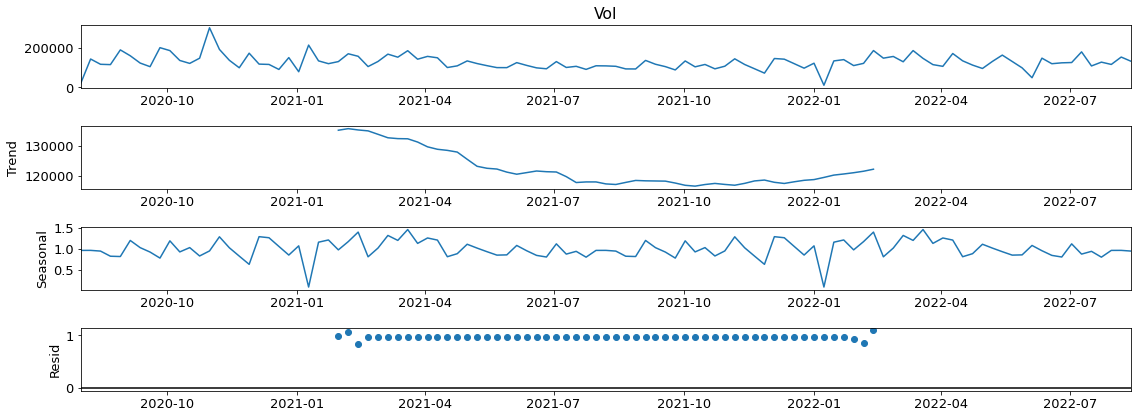

In [53]:
#decomposing data
decompose_result = seasonal_decompose(Data['Vol'],model='multiplicative')
decompose_result.plot();

In [106]:
# Set the frequency of the date time index as Monthly start as indicated by the data
Data.index.asfreq ='Wk'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

In [107]:
# Split into train and test set
train_Data = Data[:83]
test_Data = Data[83:]

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


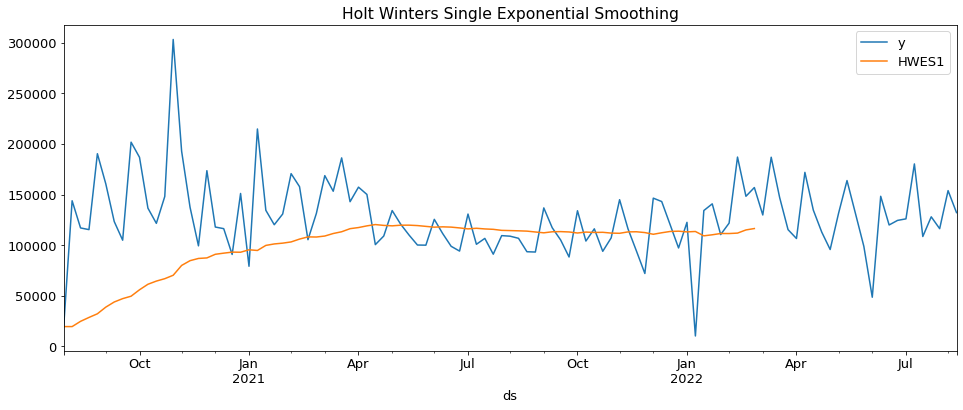

In [109]:
#Single HWES
Data['HWES1'] = SimpleExpSmoothing(train_Data['y']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
Data[['y','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\anaconda3\lib\s

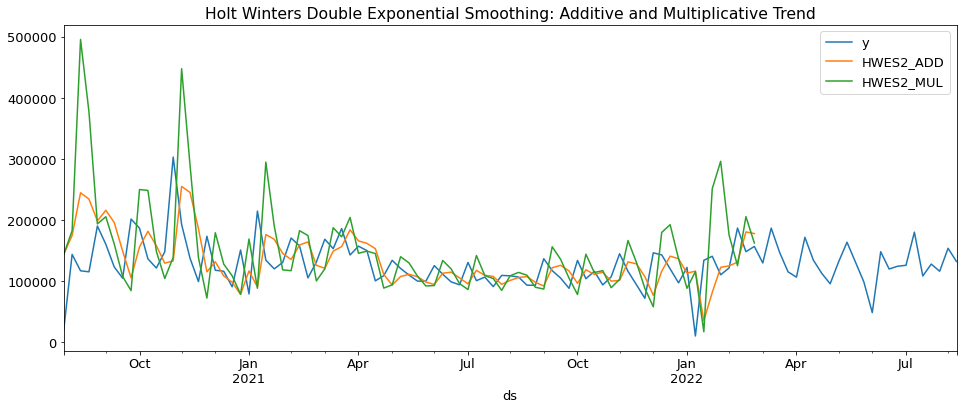

In [110]:
#Double HWES - fit the data on both Additive and Multiplicative Trend
Data['HWES2_ADD'] = ExponentialSmoothing(train_Data['y'],trend='add').fit().fittedvalues
Data['HWES2_MUL'] = ExponentialSmoothing(train_Data['y'],trend='mul').fit().fittedvalues
Data[['y','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\anaconda3\lib\s

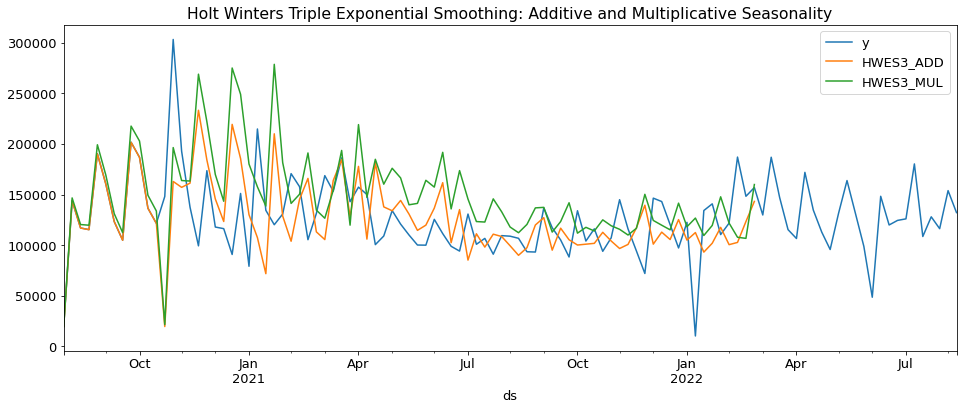

In [111]:
#Triple HWES
Data['HWES3_ADD'] = ExponentialSmoothing(train_Data['y'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
Data['HWES3_MUL'] = ExponentialSmoothing(train_Data['y'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
Data[['y','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

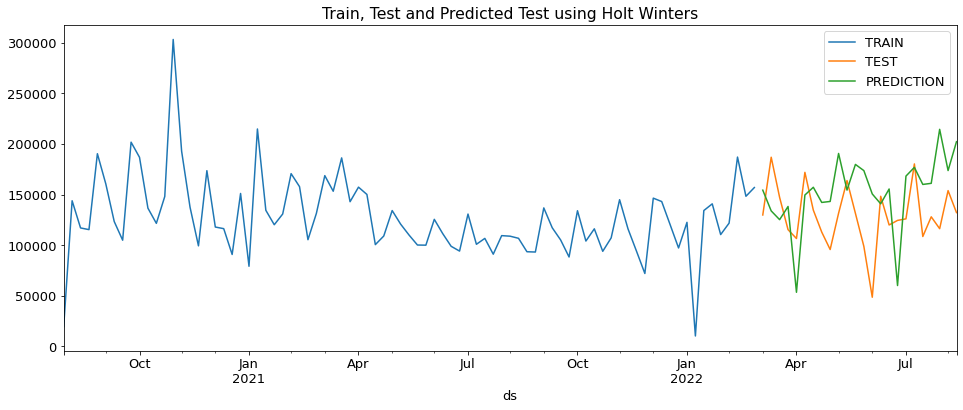

In [112]:
fitted_model = ExponentialSmoothing(train_Data['y'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_Data['y'].plot(legend=True,label='TRAIN')
test_Data['y'].plot(legend=True,label='TEST',figsize=(16,6))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

ConversionError: Failed to convert value(s) to axis units: '2022–02–01'

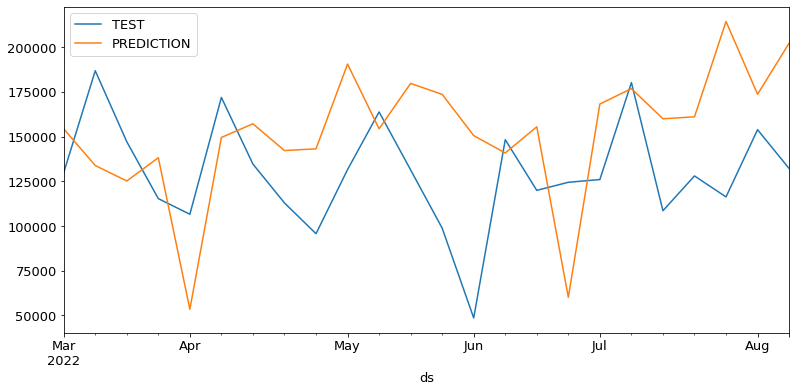

In [113]:
test_Data['y'].plot(legend=True,label='TEST',figsize=(13,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2022–02–01','2022–09–01']);

In [114]:
#evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_Data,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_Data,test_predictions)}')

Mean Absolute Error = 42343.793889450106
Mean Squared Error = 2466370014.5956573


In [115]:
#checking R2 value for model performance
from sklearn.metrics import r2_score
r2 = r2_score(test_Data,test_predictions)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -1.8849191101789753


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Data Predicted using Holt Winters')

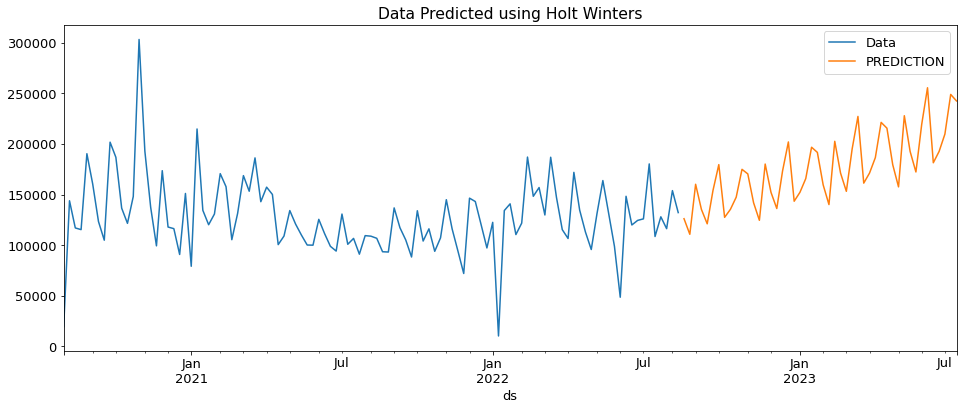

In [116]:
fitted_model = ExponentialSmoothing(Data['y'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
predictions = fitted_model.forecast(48)
Data['y'].plot(legend=True,label='Data')
predictions.plot(legend=True,label='PREDICTION')
plt.title('Data Predicted using Holt Winters')

In [100]:
#export results
file_name = 'Holt_Winter_Results.xlsx'
predictions.to_excel(file_name)